In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sparse-V Attention on TriviaQA

This notebook contains analysis of the "sparse-V" attention experiments, i.e. experiments where the `softmax` function within self-attention is modified so that only the top-k output values are kept.

## TriviaQA-2k

Experiments on a subset of the TriviaQA dataset, containing only questions with a single attached document of length within [1500, 1950] tokens (see TriviaQA notebook).

The first set of "baseline" experiments runs the regular models using either no additional context prepended to the question (closed-book), or with the relevant document prepended to the prompt (open-book).

In [3]:
df_base = pd.read_json("results/triviaqa2k_baseline.jsonl", lines=True)

In [4]:
df_base

,model,closed_book_acc,open_book_acc
0,pythia-70m,0.002247,0.020225
1,pythia-160m,0.002247,0.033708
2,pythia-410m,0.017978,0.204494
3,pythia-1b,0.024719,0.325843
4,pythia-1.4b,0.044944,0.289888
5,pythia-2.8b,0.042697,0.413483


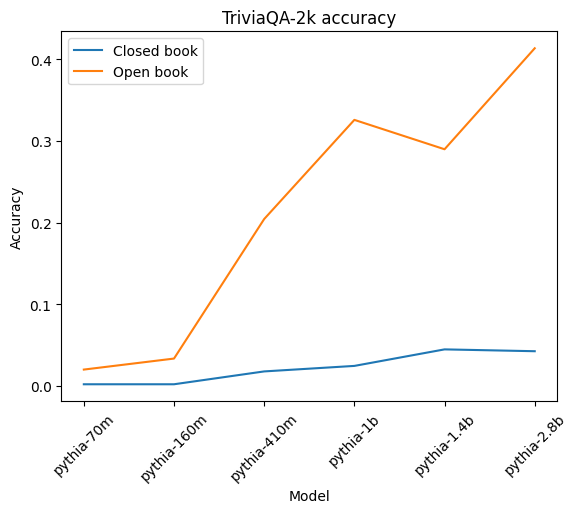

In [5]:
plt.figure()
for col, label in zip(["closed_book_acc", "open_book_acc"], ["Closed book", "Open book"]):
    plt.plot(df_base["model"], df_base[col], label=label)
plt.legend()
plt.tick_params(axis="x", labelrotation=45)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("TriviaQA-2k accuracy")
plt.show()

All models showcase low accuracy with the closed book setting, indicating that they require additional context in order to answer the questions. Prepending the relevant documents significantly increases the accuracy, indicating that the models are able to attend to the relevant parts of the context to increase the question-answering accuracy.

The open book result is the "best we can do" in this setting - we want to see how close the sparse attention methods can remain to this.

In [6]:
df_sparse = pd.read_json("results/triviaqa2k_sparse_softmax.jsonl", lines=True)

In [7]:
df_sparse

,model,open_book_acc,k,_duration
0,pythia-70m,0.004494,4,151.045512
1,pythia-70m,0.004494,8,149.744262
2,pythia-70m,0.004494,16,134.294208
3,pythia-70m,0.011236,32,133.215585
4,pythia-70m,0.015730,64,132.983823
5,pythia-70m,0.015730,128,126.910893
6,pythia-70m,0.020225,256,162.505186
7,pythia-160m,0.033708,4,467.852078
8,pythia-160m,0.049438,8,428.191935
9,pythia-160m,0.049438,16,366.527653


In [8]:
grouped = df_sparse.groupby("k")

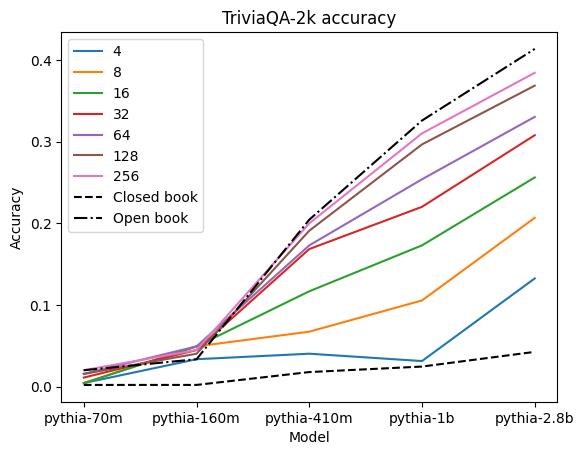

In [9]:
plt.figure()
# Sparse attention
for k, group in grouped:
    plt.plot(group["model"], group["open_book_acc"], label=k)

# 1.4b is missing currently
df_b = df_base.loc[df_base["model"] != "pythia-1.4b"]

for col, label, linestyle in zip(["closed_book_acc", "open_book_acc"], ["Closed book", "Open book"], ["dashed", "dashdot"]):
    plt.plot(df_b["model"], df_b[col], label=label, color="black", linestyle=linestyle)
plt.legend()
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("TriviaQA-2k accuracy")
plt.show()